In [4]:
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

In [7]:
!pip install openpyxl

  Using cached openpyxl-3.0.6-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.0.1-py3-none-any.whl
  Using cached jdcal-1.4.1-py2.py3-none-any.whl (9.5 kB)


In [35]:
X = np.array([1,1,2,2,3,3,4,4,5])
X = sm.add_constant(X)
X

array([[1., 1.],
       [1., 1.],
       [1., 2.],
       [1., 2.],
       [1., 3.],
       [1., 3.],
       [1., 4.],
       [1., 4.],
       [1., 5.]])

In [ ]:
sm.add_constant(np.random.normal(20, 3, 20))
a =np.array(range(1, 10))
print(a)
np.argsort(a)

In [12]:
np.random.seed(0)
x1 = np.random.normal(20, 3, 20)
y0 = 5 + 0.5 * x1
y1 = 5 + 0.5 * x1 + np.random.normal(0, 1, 20)
print(sm.add_constant(x1), '\n', y1)
lm = sm.OLS(y1, sm.add_constant(x1)).fit()

[[ 1.         25.29215704]
 [ 1.         21.20047163]
 [ 1.         22.93621395]
 [ 1.         26.7226796 ]
 [ 1.         25.60267397]
 [ 1.         17.06816636]
 [ 1.         22.85026525]
 [ 1.         19.54592838]
 [ 1.         19.69034344]
 [ 1.         21.23179551]
 [ 1.         20.43213071]
 [ 1.         24.36282052]
 [ 1.         22.28311318]
 [ 1.         20.36502505]
 [ 1.         21.3315897 ]
 [ 1.         21.00102298]
 [ 1.         24.48223722]
 [ 1.         19.38452521]
 [ 1.         20.9392031 ]
 [ 1.         17.43771278]] 
 [15.0930887  16.25385441 17.33254318 17.61917478 20.07109161 12.07971751
 16.47089114 14.58578034 16.37795094 17.08525652 15.37101278 17.55957278
 15.25377084 13.20171606 15.3178827  15.65686046 18.47140929 15.89464245
 15.08227474 13.41655364]


In [4]:
def try_parsing_date(text):
    for fmt in ('%m/%d/%Y', '%d-%m-%Y', '%Y-%m-%d'):
        try:
            return datetime.datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')
data

,Cost Code,Business Type,Region,Contract Type,Hire Date,Office Location,Country,Level,Gender,FTE,Join Date,Table Type,GOC-Finance Mapping,Business Type - Level 1,Business Type - Level 2,Business Type - Level 3,Business Type - Level 4,Business Type - Level 5
0,3900033,Human Resources,India,Contractor,2015-07-30,Gurgaon Office,India,Temp Staff,Female,1.0,2015-07-30 00:00:00,Joiners,S,Group Chief People Officer,Total HR,HR Shared Services,Investigations and Background Vetting,Investigations and Background Vetting
1,2530095,Compliance,UK,Contractor,2017-10-09,Kingswood Fields Office,UK,Temp Staff,Female,1.0,2017-10-09 00:00:00,Joiners,A,Group General Counsel,Group General Counsel Excl VAT,Oversight & Assurance,UK Compliance Advisory,UK Compliance Advisory
2,2530095,Compliance,UK,Contractor,2015-05-05,Hildenborough Office,UK,Temp Staff,Male,1.0,2015-05-05 00:00:00,Joiners,A,Group General Counsel,Group General Counsel Excl VAT,Oversight & Assurance,UK Compliance Advisory,UK Compliance Advisory
3,2530087,Risk Management,UK,Contractor,2015-05-05,Kingswood Fields Office,UK,Temp Staff,Male,1.0,2015-05-05 00:00:00,Joiners,A,Group General Counsel,Group General Counsel Excl VAT,Chief of Risk,Europe Risk,Europe Risk
4,2530086,Compliance,UK,Contractor,2016-04-11,Cannon Street Office,UK,Temp Staff,Male,1.0,2016-04-11 00:00:00,Joiners,A,Group General Counsel,Group General Counsel Excl VAT,Oversight & Assurance,Global Compliance Monitoring,Global Compliance Monitoring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10545,4590556,Technology,Asia,FIL Permanent,2019-12-23,Dalian Office,China - Dalian,Junior Staff,Female,1.0,43822,Joiners,S,Technology and Digital,Global Technology,Technology Ex Data Cybersecurity,Technology Ex Data Centre,Technology Ex Data Centre
10546,7790908,Technology,India,FIL Permanent,2019-12-23,Gurgaon Office,India,Junior Staff,Female,1.0,43822,Joiners,S,Technology and Digital,Global Technology,Technology Ex Data Cybersecurity,Technology Ex Data Centre,Technology Ex Data Centre
10547,7780959,Technology,India,FIL Permanent,2019-12-23,Gurgaon Office,India,Junior Staff,Female,1.0,43822,Joiners,S,Technology and Digital,Global Technology,Technology Ex Data Cybersecurity,Technology Ex Data Centre,Technology Ex Data Centre
10548,7780556,Technology,India,FIL Permanent,2019-12-19,Gurgaon Office,India,Junior Staff,Male,1.0,43818,Joiners,S,Technology and Digital,Global Technology,Technology Ex Data Cybersecurity,Technology Ex Data Centre,Technology Ex Data Centre


60


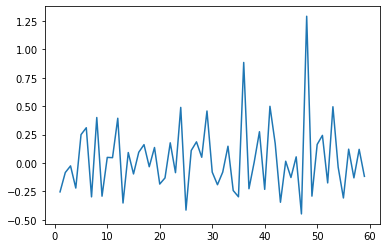

In [14]:
data = pd.read_excel("/home/aumaron/Desktop/datasets/fidelity_people_analytics.xlsx", engine='openpyxl', sheet_name="Joiners")
# data['Hire Date'] = data['Hire Date'].apply(lambda x: try_parsing_date(x))
data['Hire Date'].dt.to_period("M")
g = data.groupby(data['Hire Date'].dt.to_period("M"))
a_ = g.sum()
print(len(a_.index.tolist()))
a_['perc_chg'] = a_['FTE'].pct_change()
a_['perc_chg']
plt.plot(a_['perc_chg'].tolist())

In [15]:
def take_sec(elem):
    return elem[1]

# LOF
clf = LocalOutlierFactor(n_neighbors=int(np.sqrt(len(a_['perc_chg']))), contamination='auto')
clf.fit_predict(a_['perc_chg'].dropna().to_numpy().reshape(-1, 1))

_list = sorted(enumerate(clf.negative_outlier_factor_.tolist()), reverse=False, key=take_sec)
print(_list)
_outlier_index = [(a, b) for a, b in _list if b <= -5.0]
print(_outlier_index)
for index, lof in _outlier_index:
    print(a_['perc_chg'][index+a_['perc_chg'].isna().sum()])
print(a_['perc_chg'].index[48])
print(a_['perc_chg'].index[36])

[(47, -4.020674310740016), (35, -2.482665153584872), (46, -2.0858941633765973), (38, -1.7010570709723754), (24, -1.676913232866409), (4, -1.5001309677305579), (50, -1.4463802950978366), (5, -1.3685773645450843), (40, -1.2263366988800732), (52, -1.222196601807828), (23, -1.2159350851449402), (28, -1.18184869352827), (7, -1.1659687135828727), (11, -1.1659687135828727), (12, -1.1124461590479484), (2, -1.1044888144638787), (19, -1.0773060359020703), (26, -1.0761767357561445), (53, -1.0610984518289661), (42, -1.0604979502393064), (17, -1.0531289002684059), (30, -1.0423608582516146), (51, -1.0367337186885786), (13, -1.0302678588345213), (14, -1.0301337373647697), (37, -1.0246432466884408), (21, -1.0234993959681307), (15, -1.0232686722890416), (58, -1.02127282915609), (43, -1.0167407945370441), (32, -1.011230637301229), (3, -1.0108986648753489), (16, -1.0013746318917212), (41, -1.0013746318917212), (49, -1.001374631891721), (10, -0.999047039990704), (54, -0.998879861500944), (36, -0.991925044

The rsquared values is 0.0037581520148207703
[ 1.05470551e-01 -8.48770663e-01 -2.91546692e-01 -1.04371003e-01
 -7.44277006e-01  7.86121487e-01  9.81116571e-01 -1.00759011e+00
  1.27177471e+00 -9.92584084e-01  1.13255781e-01  1.02071191e-01
  1.22968302e+00 -1.20176158e+00  2.35959114e-01 -3.71910682e-01
  2.36862259e-01  4.48080713e-01 -1.78957110e-01  3.59609326e-01
 -6.75295005e-01 -5.04258451e-01  4.80857153e-01 -3.62354059e-01
  1.49533514e+00 -1.44490235e+00  2.50365431e-01  4.89853414e-01
  5.30851441e-02  1.36920417e+00 -3.71221373e-01 -7.31062228e-01
 -3.79042589e-01  3.45573692e-01 -9.07907443e-01 -1.09277783e+00
  2.87617227e+00 -8.68335645e-01 -1.17079278e-01  7.36544598e-01
 -8.98052498e-01  1.46960323e+00  3.92581017e-01 -1.28620389e+00
 -1.14718223e-01 -5.79685547e-01  1.60353743e-03 -1.65488553e+00
  4.68007841e+00 -1.13521831e+00  3.40339924e-01  5.96108347e-01
 -7.65022358e-01  1.43012473e+00 -3.22160933e-01 -1.22101262e+00
  1.85995049e-01 -6.42041071e-01  1.74188413e

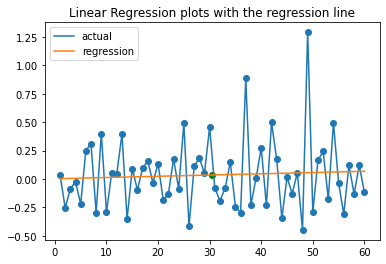

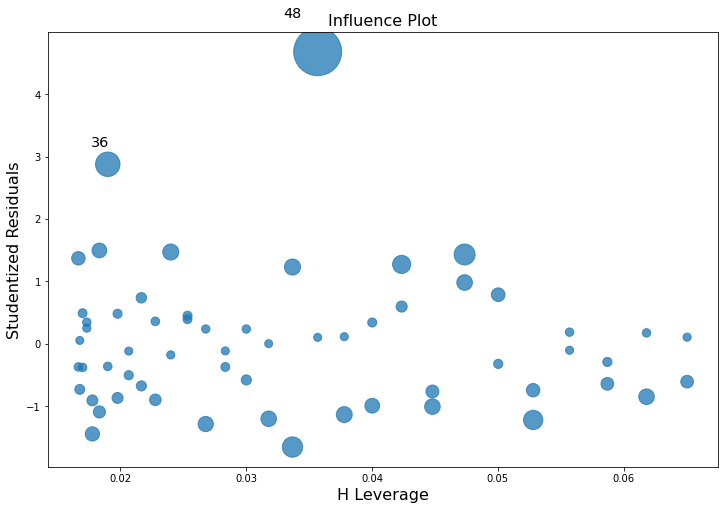

In [16]:
# OLS; Cook's Distance
y1 = a_['perc_chg'].fillna(a_['perc_chg'].mean()).to_numpy()
x1 = np.array(range(1, 1+len(a_['perc_chg'])))

lm = sm.OLS(y1, sm.add_constant(x1)).fit()
print("The rsquared values is " + str(lm.rsquared))

plt.scatter(x1, y1)
plt.scatter(np.mean(x1), np.mean(y1), color = "green")
plt.plot(x1, y1, label = "actual")
plt.plot(x1, lm.predict(), label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")

# normalized residuals
model_norm_residuals = lm.get_influence().resid_studentized_external
print(model_norm_residuals, '\n')
# leverage, from statsmodels internals
model_leverage = lm.get_influence().hat_matrix_diag
print(model_leverage, '\n')
# cook's distance, from statsmodels internals
model_cooks = lm.get_influence().cooks_distance[0]
print(model_cooks)

In [17]:
print(sorted(enumerate(model_cooks), reverse=True, key=take_sec))
print(a_['perc_chg'].mean()*3)
print(len(a_['perc_chg']))

[(48, 0.29791156730374674), (36, 0.07123963808787959), (53, 0.04993473582672014), (47, 0.04634470762321347), (55, 0.041205694363000665), (8, 0.03539036126486002), (12, 0.02612522978744755), (41, 0.026051256175834942), (49, 0.025186584533909758), (6, 0.023940508933640463), (1, 0.02384371045674546), (7, 0.02380138072471886), (13, 0.023534054317841564), (43, 0.022519482047242124), (9, 0.020541607588747623), (24, 0.020460339306258735), (25, 0.018560872281201297), (5, 0.016378619989487666), (29, 0.015664681100520654), (4, 0.015559624466220272), (52, 0.013823351885744581), (57, 0.012982796960371213), (59, 0.012977947249364866), (35, 0.011122591940658372), (40, 0.009437281129434738), (51, 0.007946351449133563), (37, 0.007644948273904067), (34, 0.007488443974289824), (39, 0.006059344285263984), (45, 0.005259777319104383), (20, 0.0051011460037822445), (31, 0.004600741955346724), (54, 0.0027754722352100842), (21, 0.002719932807644028), (2, 0.0026924099993127716), (17, 0.0026474722784811905), (50

# Outlier detection using EWMA

In [2]:
import pandas as pd

60


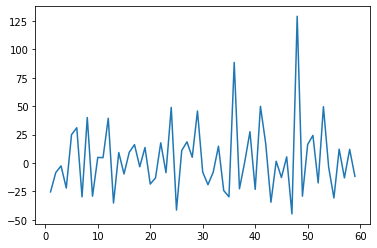

In [18]:
data = pd.read_excel("/home/aumaron/Desktop/datasets/fidelity_people_analytics.xlsx", engine='openpyxl', sheet_name="Joiners")
# data['Hire Date'] = data['Hire Date'].apply(lambda x: try_parsing_date(x))
data['Hire Date'].dt.to_period("M")
g = data.groupby(data['Hire Date'].dt.to_period("M"))
a_ = g.sum()
print(len(a_.index.tolist()))
a_['perc_chg'] = a_['FTE'].pct_change()*100
a_['perc_chg']
plt.plot(a_['perc_chg'].tolist())


sma = a_["perc_chg"].rolling(4, min_periods=4).mean()[:4]
sma

rest = a_["perc_chg"][4:]

In [19]:
a_["ema"] = a_["perc_chg"].ewm(alpha=0.9, adjust=True).mean()
a_["ema_std"] = a_["perc_chg"].ewm(alpha=0.9, adjust=True).std()
a_

,Cost Code,FTE,perc_chg,ema,ema_std
Hire Date,,,,,
2015-01,834109102,231.2282,NaN,NaN,NaN
2015-02,613028117,172.5543,-25.374889,-25.374889,NaN
2015-03,573918808,158.1133,-8.368960,-9.914953,12.025008
2015-04,596675830,154.1154,-2.528503,-3.260494,6.338737
2015-05,456763201,120.1981,-22.007729,-20.134693,13.340588
2015-06,592737009,150.2428,24.995986,20.483324,32.031178
2015-07,750967715,196.8714,31.035497,29.980289,12.558180
2015-08,539140776,138.3000,-29.751096,-23.777963,42.211975
2015-09,642909190,193.6667,40.033767,33.652595,46.837952


In [36]:
a_["perc_chg"].ewm(alpha=0.9, adjust=True).mean()

Hire Date
2015-01           NaN
2015-02    -25.374889
2015-03     -9.914953
2015-04     -3.260494
2015-05    -20.134693
2015-06     20.483324
2015-07     29.980289
2015-08    -23.777963
2015-09     33.652595
2015-10    -22.875715
2015-11      2.173070
2015-12      4.467307
2016-01     35.897659
2016-02    -28.051528
2016-03      5.498222
2016-04     -8.079901
2016-05      7.728436
2016-06     15.328350
2016-07     -1.411090
2016-08     12.149271
2016-09    -15.435912
2016-10    -13.332670
2016-11     14.668233
2016-12     -6.157380
2017-01     43.422446
2017-02    -32.910934
2017-03      6.641665
2017-04     17.428994
2017-05      6.310985
2017-06     41.820615
2017-07     -3.014987
2017-08    -17.470921
2017-09     -8.965484
2017-10     12.404575
2017-11    -20.524248
2017-12    -28.789825
2018-01     76.740706
2018-02    -12.677331
2018-03     -0.510941
2018-04     24.736776
2018-05    -18.364527
2018-06     43.071015
2018-07     19.769938
2018-08    -29.076079
2018-09     -1.481395


In [34]:
a_["perc_chg"].ewm(alpha=0.1, adjust=True).std()

Hire Date
2015-01          NaN
2015-02          NaN
2015-03    12.025008
2015-04    11.669858
2015-05    10.845485
2015-06    21.063679
2015-07    24.403518
2015-08    25.730456
2015-09    29.150079
2015-10    29.553581
2015-11    27.136614
2015-12    25.035678
2016-01    27.131468
2016-02    29.121621
2016-03    27.276310
2016-04    25.735377
2016-05    24.271745
2016-06    23.283219
2016-07    21.943851
2016-08    20.952185
2016-09    21.004837
2016-10    20.310409
2016-11    20.033675
2016-12    19.164491
2017-01    23.868510
2017-02    27.108676
2017-03    25.820404
2017-04    24.983121
2017-05    23.624636
2017-06    25.992803
2017-07    25.109395
2017-08    25.078338
2017-09    24.025806
2017-10    23.067296
2017-11    23.533448
2017-12    24.256595
2018-01    36.428424
2018-02    35.731159
2018-03    33.873203
2018-04    32.944654
2018-05    32.522909
2018-06    34.068181
2018-07    32.423618
2018-08    33.545662
2018-09    31.817405
2018-10    30.618525
2018-11    29.047560
201

In [7]:
a_["difference"] = a_["perc_chg"] - a_["ema"] 
a_.loc[abs(a_["difference"]) > (2*a_["perc_chg"].std()), "is_anomaly"] = "outlier"
a_[a_["is_anomaly"] == "outlier"]

,Cost Code,FTE,perc_chg,ema,ema_std,difference,is_anomaly
Hire Date,,,,,,,


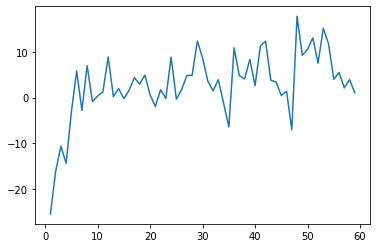

In [8]:
plt.plot(a_["perc_chg"].ewm(span=10, adjust=True).mean().tolist())

AttributeError: module 'pandas' has no attribute 'ewma'

In [29]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
times = ['2020-01-01', '2020-01-03', '2020-01-10', '2020-01-15', '2020-01-17']
df.ewm(halflife='4 days', times=pd.DatetimeIndex(times)).mean()

,B
0,0.000000
1,0.585786
2,1.523889
3,1.523889
4,3.233686


In [30]:
df.ewm(halflife='4 days', times=pd.DatetimeIndex(times)).std()

,B
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [2]:
help(pd)

AttributeError: module 'pandas' has no attribute 'ewm'